# Logistic Regression Model

### 1. Load libraries

In [41]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### 2. Split train-test datasets

In [42]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")
df_total = pd.concat([df_train, df_test])


y_train = df_train.Activity
x_train = df_train.drop(['subject', 'Activity'], axis=1)

y_test = df_test.Activity
x_test = df_test.drop(['subject', 'Activity'], axis=1)


print('X_train : ', x_train.shape)
print('y_train : ', y_train.shape)
print('X_test : ', x_test.shape)
print('y_test : ', y_test.shape)

X_train :  (7352, 561)
y_train :  (7352,)
X_test :  (2947, 561)
y_test :  (2947,)


### 3. Build Logistic Regression before Hyperparameter Tuning

In [43]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

####  a) Accuracy

In [44]:
accuracy = logistic_model.score(x_test, y_test)*100
print("Accuracy:",accuracy)

Accuracy: 95.79233118425518


#### b) Confusion Table

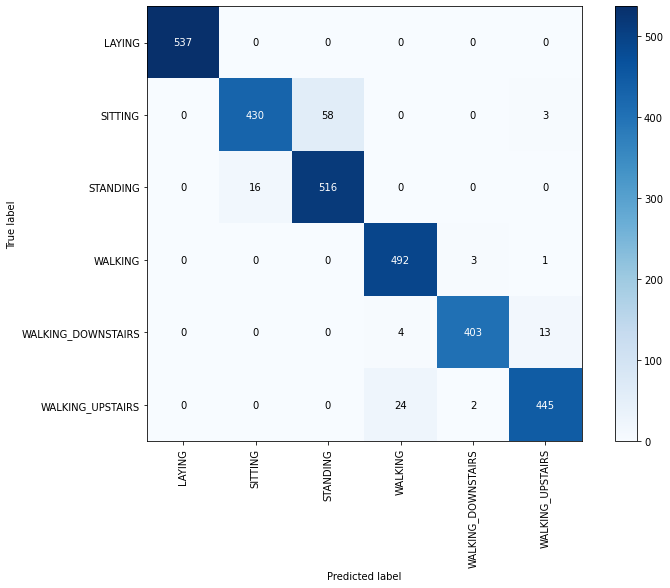

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(ax.imshow(cm, cmap=plt.cm.Blues), ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")

### 4. Build Logistic Regression with Hyperparameter Tuning

In [46]:
parameter = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.arange(10, 60, 10),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
    }

In [47]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(logistic_model, param_distributions = parameter, cv = 5)

In [48]:
best_clf = clf.fit(x_train,y_train)

In [49]:
y_pred2 = clf.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)

#### a) Accuracy

In [50]:
accuracy = best_clf.score(x_test, y_test)*100
print("Accuracy:",accuracy)

Accuracy: 96.26739056667797


#### b) Confusion Table

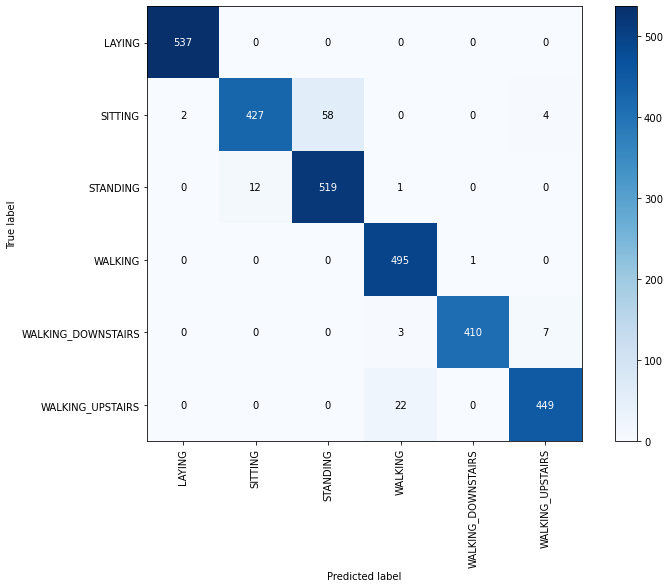

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(cm2, cmap=plt.cm.Blues)
ax.figure.colorbar(ax.imshow(cm2, cmap=plt.cm.Blues), ax=ax)
ax.set(
    xticks=np.arange(cm2.shape[1]),
    yticks=np.arange(cm2.shape[0]),
    xticklabels=np.unique(y_pred2),
    yticklabels=np.unique(y_pred2),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm2.max() / 2.
for i in range(cm2.shape[0]):
        for j in range(cm2.shape[1]):
            ax.text(j, i, int(cm2[i, j]),ha="center", va="center",color="white" if cm2[i, j] > thresh else "black")